# Data Understanding

In [1]:
#Mysql
!pip install pymysql
#Postgresql
!pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


id,class,petal_length,petal_width,sepal_length,sepal_width
1,Iris-setosa,1.4,0.2,5.1,3.5
2,Iris-setosa,14.0,2.0,40.9,30.0
3,Iris-setosa,1.3,0.2,4.7,3.2
4,Iris-setosa,1.5,0.2,4.6,3.1
5,Iris-setosa,1.4,0.2,5.0,3.6
6,Iris-setosa,1.7,0.4,5.4,3.9
7,Iris-setosa,1.4,0.3,4.6,3.4
8,Iris-setosa,1.5,0.2,5.0,3.4
9,Iris-setosa,1.4,0.2,4.4,2.9
10,Iris-setosa,1.5,0.1,4.9,3.1


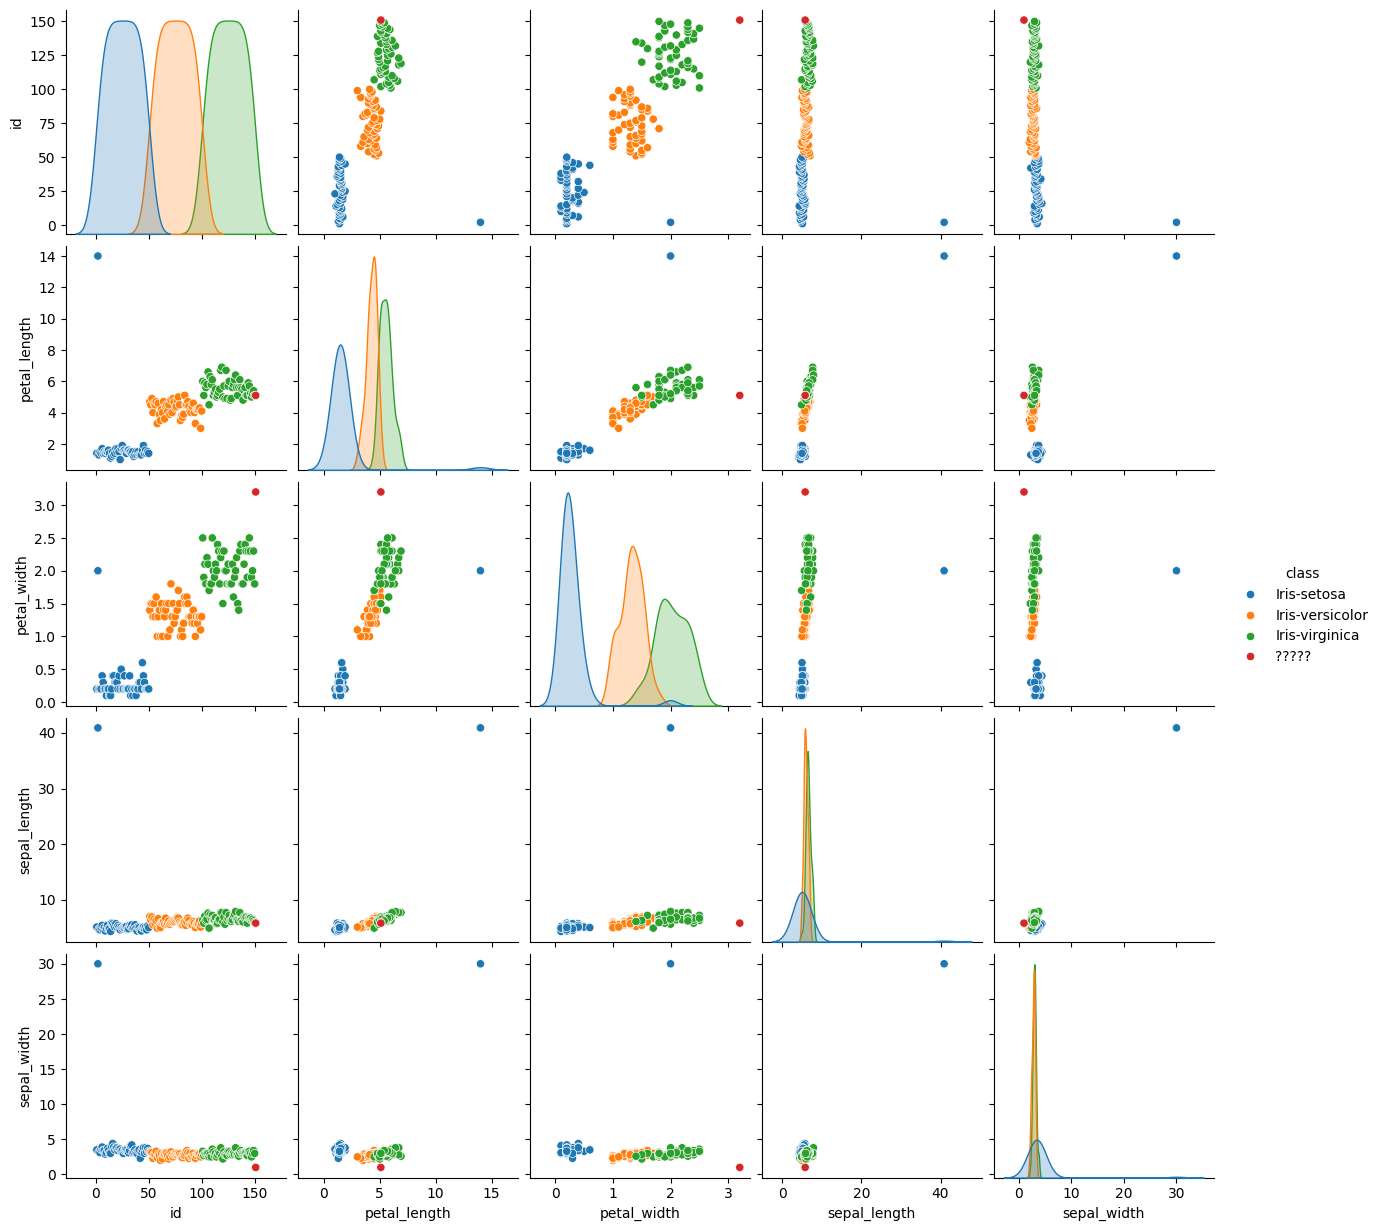

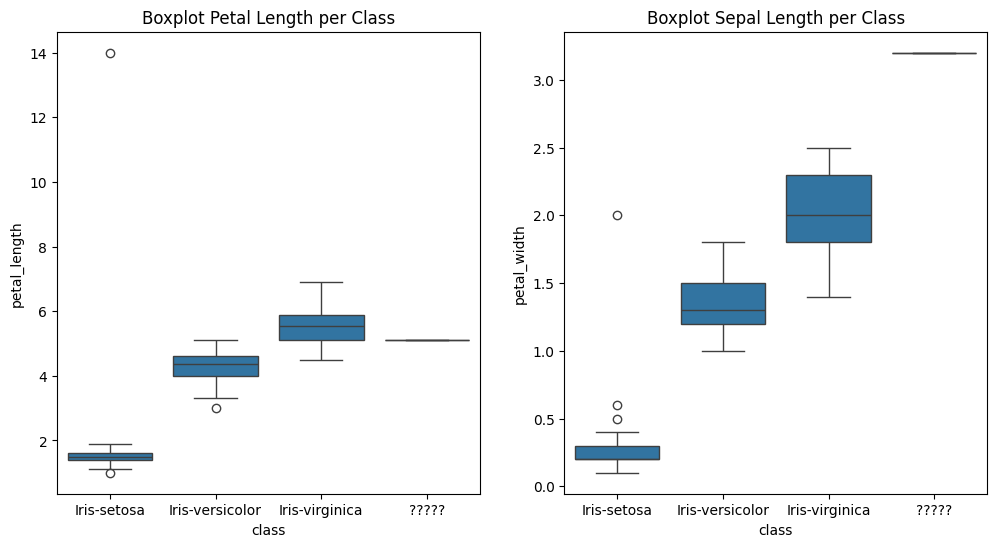

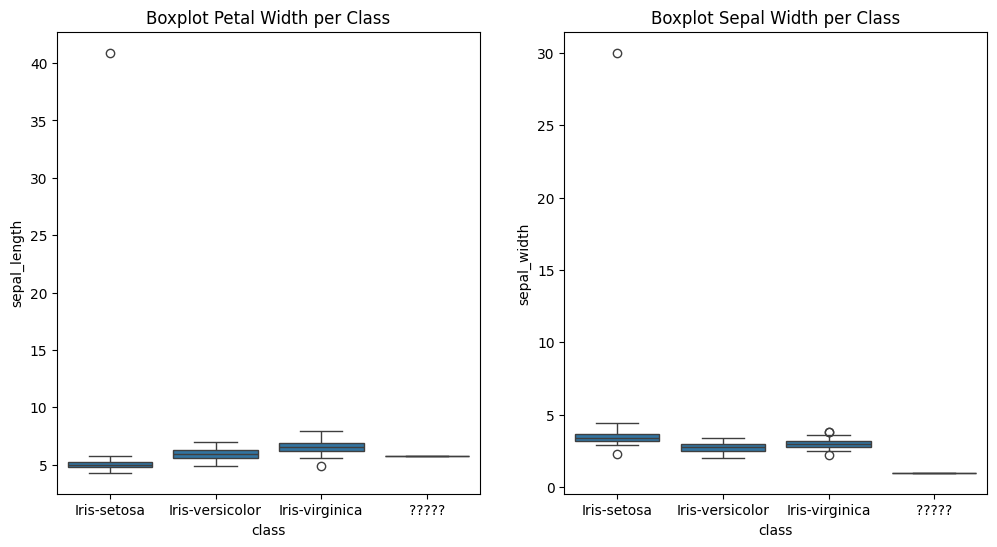

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def get_pg_data():
    conn = psycopg2.connect(
        host="postgresqltest-projectadzin.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_k58rpi0pi31N8ucX-vK",
        database="defaultdb",
        port=16209
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-386c0068-projectadzin.l.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Zr6_we8osFXobQb3qi",
        database="iris",
        port=16209
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
display(HTML(df_merged.to_html(index=False)))

print("\n")
# Visualisasi data
# Scatter plot antar variabel
sns.pairplot(df_merged, hue="class")
plt.show()

# Visualisasi data dengan boxplot per class
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 2], data=df_merged)
plt.title("Boxplot Petal Length per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 3], data=df_merged)
plt.title("Boxplot Sepal Length per Class")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 4], data=df_merged)
plt.title("Boxplot Petal Width per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 5], data=df_merged)
plt.title("Boxplot Sepal Width per Class")

plt.show()

In [ ]:
df_merged.to_excel("iris.xlsx", index=False)